In [11]:
import pandas as pd
import numpy as np
%matplotlib inline

Remember- Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components. Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

This is a very popular scheme to produce a smoothed Time Series. Whereas in Single Moving Averages the past observations are weighted equally, Exponential Smoothing assigns exponentially decreasing weights as the observation get older.
In other words, recent observations are given relatively more weight in forecasting than the older observation

Single Exponential Smoothing - Single Exponential Smoothing, SES for short, also called Simple Exponential Smoothing, is a time series forecasting method for univariate data without a trend or seasonality.

It requires a single parameter, called alpha (a), also called the smoothing factor or smoothing coefficient.

This parameter controls the rate at which the influence of the observations at prior time steps decay exponentially. Alpha is often set to a value between 0 and 1. Large values mean that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction.

Double Exponential Smoothing - Double Exponential Smoothing is an extension to Exponential Smoothing that explicitly adds support for trends in the univariate time series.

In addition to the alpha parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta (b).

The method supports trends that change in different ways: an additive and a multiplicative, depending on whether the trend is linear or exponential respectively.

Double Exponential Smoothing with an additive trend is classically referred to as Holt’s linear trend model, named for the developer of the method Charles Holt.

Additive Trend: Double Exponential Smoothing with a linear trend.
Multiplicative Trend: Double Exponential Smoothing with an exponential trend.

Triple Exponential Smoothing- It is an extension of Exponential Smoothing that explicitly adds support for seasonality to the univariate time series.

This method is sometimes called Holt-Winters Exponential Smoothing, named for two contributors to the method: Charles Holt and Peter Winters.

In addition to the alpha and beta smoothing factors, a new parameter is added called gamma (g) that controls the influence on the seasonal component.

As with the trend, the seasonality may be modeled as either an additive or multiplicative process for a linear or exponential change in the seasonality.

Additive Seasonality: Triple Exponential Smoothing with a linear seasonality.
Multiplicative Seasonality: Triple Exponential Smoothing with an exponential seasonality.
Triple exponential smoothing is the most advanced variation of exponential smoothing and through configuration, it can also develop double and single exponential smoothing mode

df = pd.read_csv('airline_passengers.csv')

In [13]:
df.dropna(inplace=True)

In [19]:
df = df.set_index('Month')

In [20]:
df.index.freq = 'MS'
df.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [21]:
# smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

C:\Users\dhruv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01,112,112.000000,112.000000
1949-02,118,112.923077,112.923077
1949-03,132,115.857988,115.857988
1949-04,129,117.879836,117.879836
1949-05,121,118.359861,118.359861


In [22]:
# double smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df.head()

C:\Users\dhruv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\dhruv\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


,Thousands of Passengers,EWMA12,SES12,DESadd12
Month,,,,
1949-01,112,112.000000,112.000000,114.237772
1949-02,118,112.923077,112.923077,120.237772
1949-03,132,115.857988,115.857988,134.237772
1949-04,129,117.879836,117.879836,131.237772
1949-05,121,118.359861,118.359861,123.237772


In [23]:
df['DESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

C:\Users\dhruv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\dhruv\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,
1949-01,112,112.000000,112.000000,114.237772,112.049247
1949-02,118,112.923077,112.923077,120.237772,118.051885
1949-03,132,115.857988,115.857988,134.237772,132.058041
1949-04,129,117.879836,117.879836,131.237772,129.056722
1949-05,121,118.359861,118.359861,123.237772,121.053204


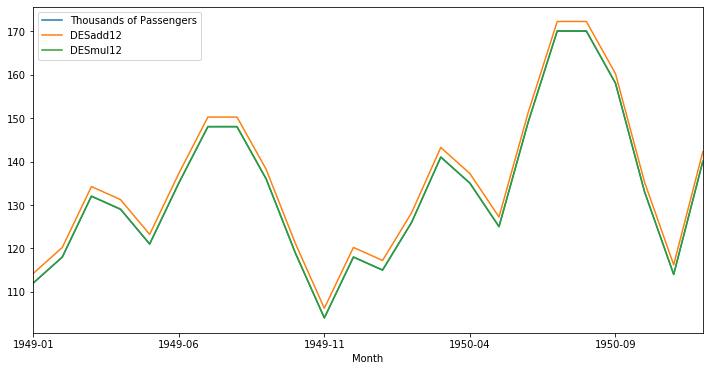

In [24]:
df[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [25]:
# triple smoothing
df['TESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\dhruv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\dhruv\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\dhruv\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\dhruv\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,
1949-01,112,112.000000,112.000000,114.237772,112.049247,113.081288
1949-02,118,112.923077,112.923077,120.237772,118.051885,120.550753
1949-03,132,115.857988,115.857988,134.237772,132.058041,135.527339
1949-04,129,117.879836,117.879836,131.237772,129.056722,133.155076
1949-05,121,118.359861,118.359861,123.237772,121.053204,125.656129


In [26]:
df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\dhruv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\dhruv\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\dhruv\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
1949-01,112,112.000000,112.000000,114.237772,112.049247,113.081288,111.608110
1949-02,118,112.923077,112.923077,120.237772,118.051885,120.550753,118.853687
1949-03,132,115.857988,115.857988,134.237772,132.058041,135.527339,133.343675
1949-04,129,117.879836,117.879836,131.237772,129.056722,133.155076,127.912641
1949-05,121,118.359861,118.359861,123.237772,121.053204,125.656129,120.991626


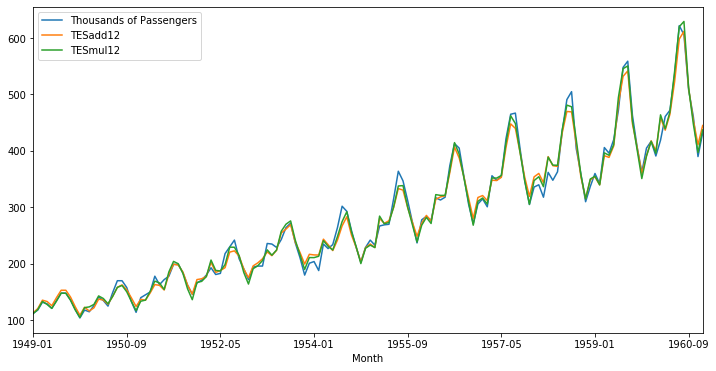

In [27]:
df[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

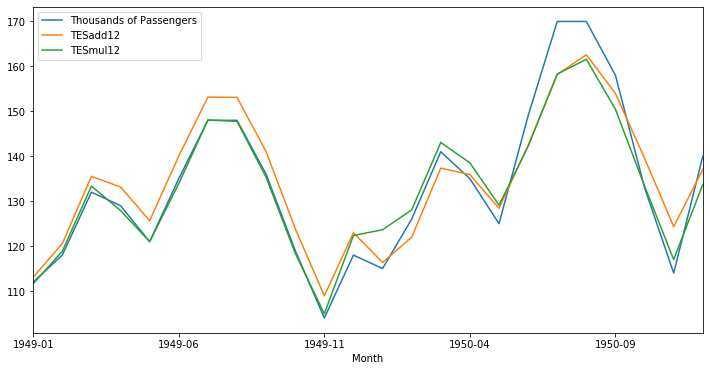

In [28]:
df[['Thousands of Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);